In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('D:\CSUN\COMP542\Dataset\phishing.csv')

In [2]:
data

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
#extract number of null from each column
data.isnull().sum()


Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [4]:
#drop index column
data.drop(['Index'], axis=1, inplace=True)


In [5]:
#devide the data into features and target
X = data.drop('class', axis=1)
y = data['class']

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print('Logistic Regression accuracy: ', log_reg_accuracy)



Logistic Regression accuracy:  0.9270425082906241


In [6]:
#display the confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
log_reg_cm


array([[1307,  148],
       [  94, 1768]], dtype=int64)

In [7]:
#train the model using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest accuracy: ', rf_accuracy)

#display the confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm


Random Forest accuracy:  0.96593307205306


array([[1389,   66],
       [  47, 1815]], dtype=int64)

In [8]:
#train the model using Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('Support Vector Machine accuracy: ', svm_accuracy)

#display the confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cm


Support Vector Machine accuracy:  0.9487488694603557


array([[1335,  120],
       [  50, 1812]], dtype=int64)

In [9]:
#train the model using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print('K-Nearest Neighbors accuracy: ', knn_accuracy)

#display the confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm


K-Nearest Neighbors accuracy:  0.9406089840217063


array([[1343,  112],
       [  85, 1777]], dtype=int64)

In [10]:
#train the model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print('Decision Tree accuracy: ', dt_accuracy)

#display the confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cm


Decision Tree accuracy:  0.9602050045221586


array([[1386,   69],
       [  63, 1799]], dtype=int64)

In [11]:
#train the model using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('Gradient Boosting accuracy: ', gb_accuracy)

#display the confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred)
gb_cm


Gradient Boosting accuracy:  0.9487488694603557


array([[1352,  103],
       [  67, 1795]], dtype=int64)

In [12]:
#train the model using AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_pred)
print('AdaBoost accuracy: ', ab_accuracy)

#display the confusion matrix
ab_cm = confusion_matrix(y_test, ab_pred)
ab_cm


AdaBoost accuracy:  0.9351823937292735


array([[1319,  136],
       [  79, 1783]], dtype=int64)

In [13]:
#train the model using Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print('Naive Bayes accuracy: ', nb_accuracy)

#display the confusion matrix
nb_cm = confusion_matrix(y_test, nb_pred)
nb_cm


Naive Bayes accuracy:  0.5993367500753694


array([[1453,    2],
       [1327,  535]], dtype=int64)

In [14]:
#train the model using Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
print('Neural Network accuracy: ', nn_accuracy)

#display the confusion matrix
nn_cm = confusion_matrix(y_test, nn_pred)   
nn_cm



Neural Network accuracy:  0.9674404582454025


c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[1388,   67],
       [  41, 1821]], dtype=int64)

In [15]:
#train the model using ANN  
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_pred)
print('ANN accuracy: ', ann_accuracy)

#display the confusion matrix
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm


ANN accuracy:  0.9668375037684654


array([[1379,   76],
       [  34, 1828]], dtype=int64)

In [16]:
#train the model using linear SVM
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(X_train, y_train)
lsvm_pred = lsvm.predict(X_test)
lsvm_accuracy = accuracy_score(y_test, lsvm_pred)
print('Linear SVM accuracy: ', lsvm_accuracy)

#display the confusion matrix
lsvm_cm = confusion_matrix(y_test, lsvm_pred)
lsvm_cm



c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM accuracy:  0.928248417244498


c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[1307,  148],
       [  90, 1772]], dtype=int64)

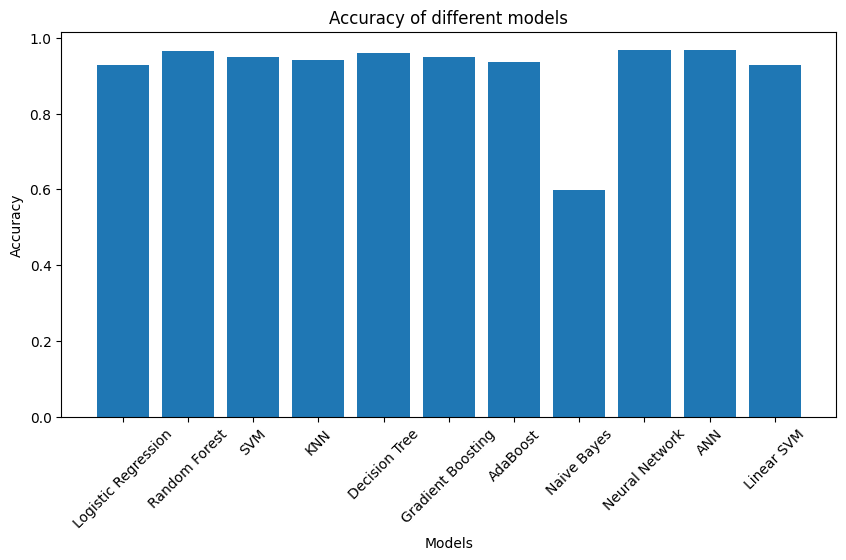

In [17]:
#now plot the accuracy of each model
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Decision Tree', 'Gradient Boosting', 'AdaBoost', 'Naive Bayes', 'Neural Network', 'ANN', 'Linear SVM']
accuracy = [log_reg_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, dt_accuracy, gb_accuracy, ab_accuracy, nb_accuracy, nn_accuracy, ann_accuracy, lsvm_accuracy]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.xticks(rotation=45)
plt.show()



In [18]:
#find f1 score of each model
from sklearn.metrics import f1_score
f1_log_reg = f1_score(y_test, log_reg_pred)
f1_rf = f1_score(y_test, rf_pred)
f1_svm = f1_score(y_test, svm_pred)
f1_knn = f1_score(y_test, knn_pred)
f1_dt = f1_score(y_test, dt_pred)
f1_gb = f1_score(y_test, gb_pred)
f1_ab = f1_score(y_test, ab_pred)
f1_nb = f1_score(y_test, nb_pred)
f1_nn = f1_score(y_test, nn_pred)
f1_ann = f1_score(y_test, ann_pred)
f1_lsvm = f1_score(y_test, lsvm_pred)

f1_scores = [f1_log_reg, f1_rf, f1_svm, f1_knn, f1_dt, f1_gb, f1_ab, f1_nb, f1_nn, f1_ann, f1_lsvm]


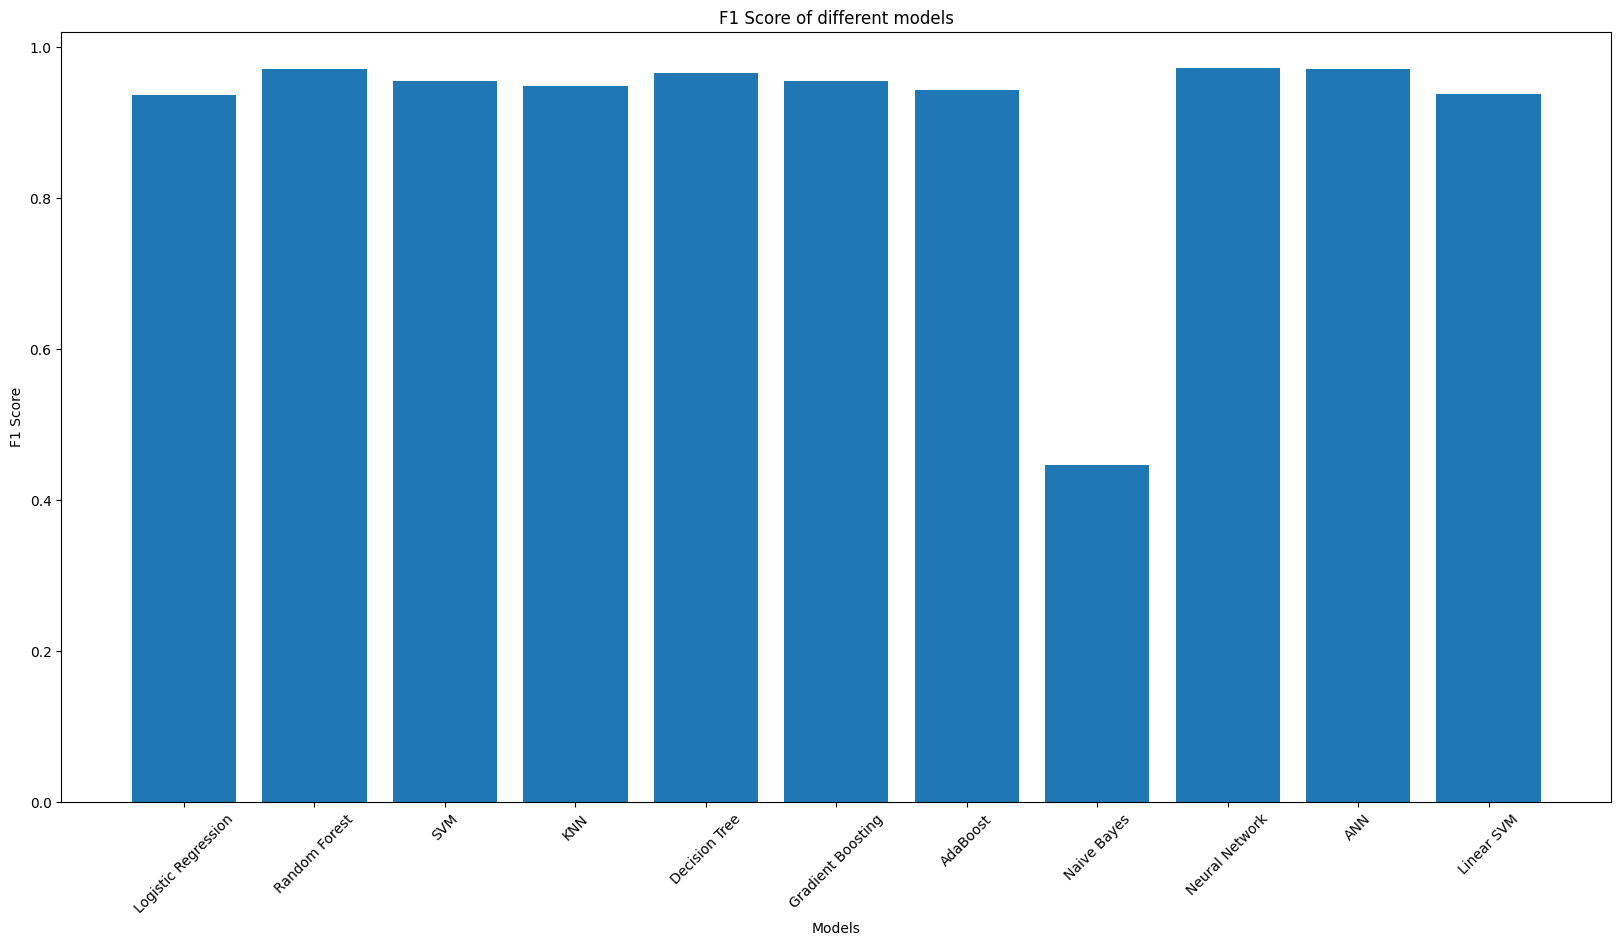

In [19]:
#plot the f1 score of each model
plt.figure(figsize=(20, 10))
plt.bar(models, f1_scores)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of different models')
plt.xticks(rotation=45)
plt.show()


In [20]:
#find precision score of each model and recall score of each model
from sklearn.metrics import precision_score, recall_score
precision_log_reg = precision_score(y_test, log_reg_pred)
precision_rf = precision_score(y_test, rf_pred)
precision_svm = precision_score(y_test, svm_pred)
precision_knn = precision_score(y_test, knn_pred)
precision_dt = precision_score(y_test, dt_pred)
precision_gb = precision_score(y_test, gb_pred)
precision_ab = precision_score(y_test, ab_pred)
precision_nb = precision_score(y_test, nb_pred)
precision_nn = precision_score(y_test, nn_pred)
precision_ann = precision_score(y_test, ann_pred)
precision_lsvm = precision_score(y_test, lsvm_pred)

recall_log_reg = recall_score(y_test, log_reg_pred)
recall_rf = recall_score(y_test, rf_pred)
recall_svm = recall_score(y_test, svm_pred)
recall_knn = recall_score(y_test, knn_pred)
recall_dt = recall_score(y_test, dt_pred)
recall_gb = recall_score(y_test, gb_pred)
recall_ab = recall_score(y_test, ab_pred)
recall_nb = recall_score(y_test, nb_pred)
recall_nn = recall_score(y_test, nn_pred)
recall_ann = recall_score(y_test, ann_pred)
recall_lsvm = recall_score(y_test, lsvm_pred)

precision_scores = [precision_log_reg, precision_rf, precision_svm, precision_knn, precision_dt, precision_gb, precision_ab, precision_nb, precision_nn, precision_ann, precision_lsvm]

recall_scores = [recall_log_reg, recall_rf, recall_svm, recall_knn, recall_dt, recall_gb, recall_ab, recall_nb, recall_nn, recall_ann, recall_lsvm]


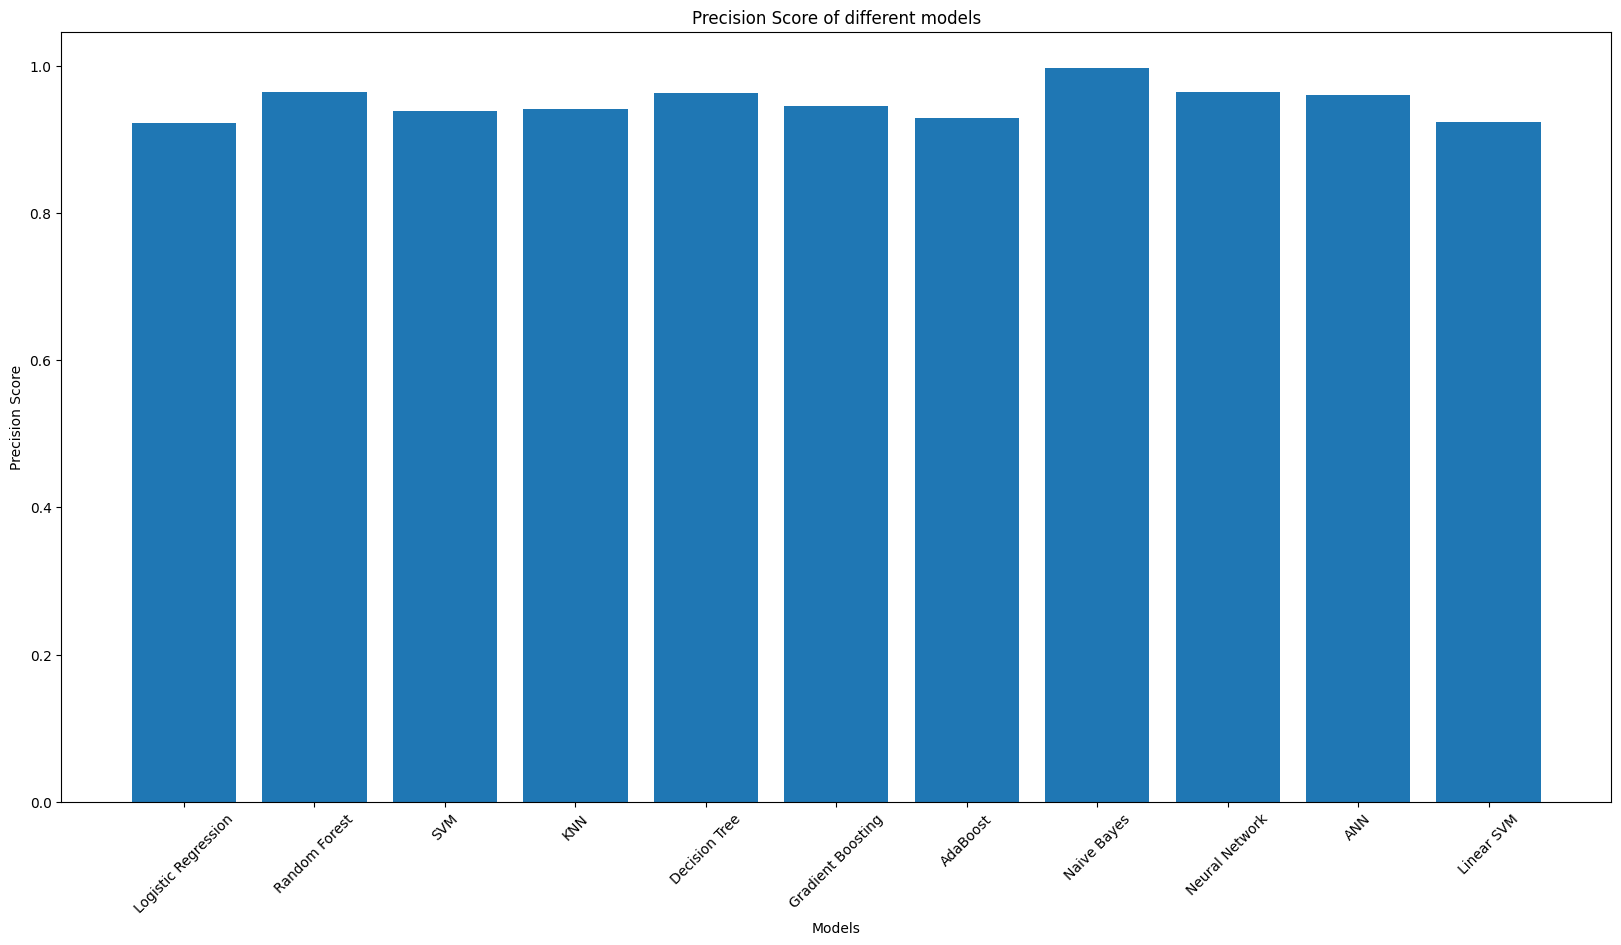

In [21]:
#plot the precision score of each model
plt.figure(figsize=(20, 10))
plt.bar(models, precision_scores)
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Precision Score of different models')
plt.xticks(rotation=45)
plt.show()


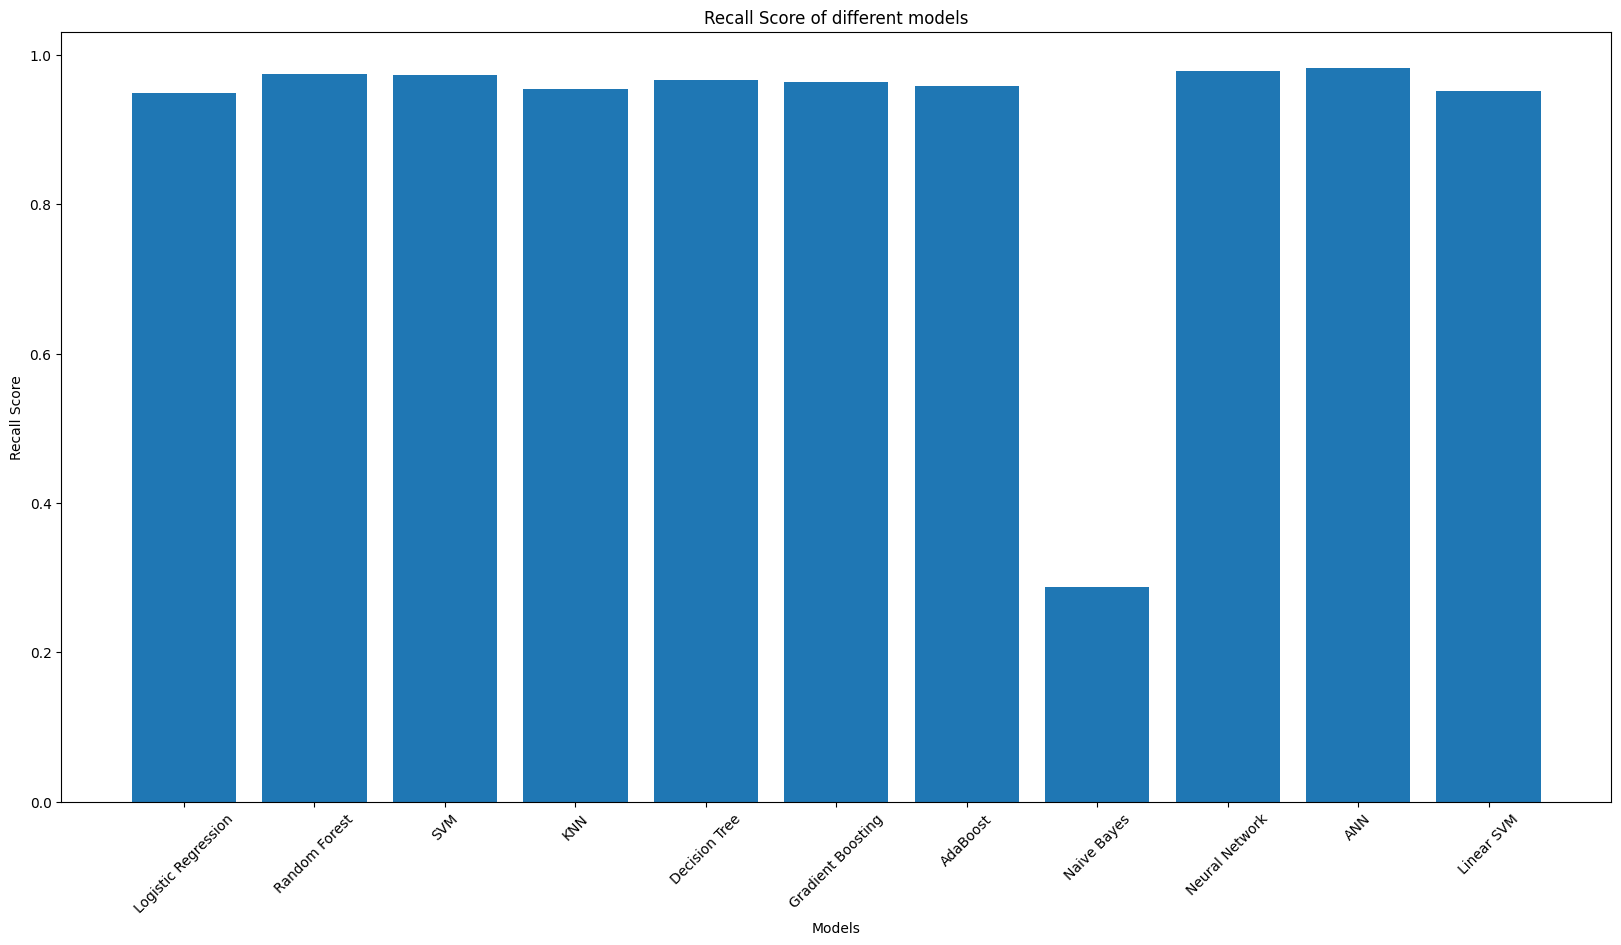

In [22]:
#plot the recall score of each model
plt.figure(figsize=(20, 10))
plt.bar(models, recall_scores)
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Recall Score of different models')
plt.xticks(rotation=45)
plt.show()



In [23]:
#select two best models and stack them
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#select two best models
best_models = [('Random Forest', rf), ('Gradient Boosting', gb)]

#stack the models
stack = StackingClassifier(estimators=best_models, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
stack_accuracy = accuracy_score(y_test, stack_pred)
print('Stacking accuracy: ', stack_accuracy)

#display the confusion matrix
stack_cm = confusion_matrix(y_test, stack_pred)
stack_cm


Stacking accuracy:  0.96593307205306


array([[1392,   63],
       [  50, 1812]], dtype=int64)

In [24]:
#now stack random forest and neural network
best_models = [('Random Forest', rf), ('Neural Network', nn)]

#stack the models
stack = StackingClassifier(estimators=best_models, final_estimator=nn)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
stack_accuracy = accuracy_score(y_test, stack_pred)
print('Stacking accuracy: ', stack_accuracy)

#display the confusion matrix
stack_cm = confusion_matrix(y_test, stack_pred)

stack_cm

     


c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Stacking accuracy:  0.9680434127223395


array([[1391,   64],
       [  42, 1820]], dtype=int64)

In [25]:
#now use this stacked model and make another stacked model with neural network
best_models = [('Stacked Model', stack), ('Neural Network', nn)]

#stack the models
stack = StackingClassifier(estimators=best_models, final_estimator=nn)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
stack_accuracy = accuracy_score(y_test, stack_pred)
print('Stacking accuracy: ', stack_accuracy)

#display the confusion matrix
stack_cm = confusion_matrix(y_test, stack_pred)
stack_cm


c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\91955\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Stacking accuracy:  0.968947844437745


array([[1395,   60],
       [  43, 1819]], dtype=int64)

In [27]:
#run catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_pred)
print('CatBoost accuracy: ', cat_accuracy)

#display the confusion matrix
cat_cm = confusion_matrix(y_test, cat_pred)


Learning rate set to 0.024681
0:	learn: 0.6527762	total: 160ms	remaining: 2m 39s
1:	learn: 0.6164527	total: 163ms	remaining: 1m 21s
2:	learn: 0.5800398	total: 170ms	remaining: 56.6s
3:	learn: 0.5482257	total: 186ms	remaining: 46.4s
4:	learn: 0.5193818	total: 217ms	remaining: 43.2s
5:	learn: 0.4903784	total: 247ms	remaining: 40.9s
6:	learn: 0.4621500	total: 277ms	remaining: 39.3s
7:	learn: 0.4391712	total: 305ms	remaining: 37.8s
8:	learn: 0.4170752	total: 353ms	remaining: 38.8s
9:	learn: 0.3988252	total: 383ms	remaining: 37.9s
10:	learn: 0.3822072	total: 398ms	remaining: 35.8s
11:	learn: 0.3648272	total: 411ms	remaining: 33.9s
12:	learn: 0.3486408	total: 427ms	remaining: 32.5s
13:	learn: 0.3354028	total: 441ms	remaining: 31.1s
14:	learn: 0.3221849	total: 455ms	remaining: 29.9s
15:	learn: 0.3106316	total: 484ms	remaining: 29.8s
16:	learn: 0.3010735	total: 500ms	remaining: 28.9s
17:	learn: 0.2921445	total: 547ms	remaining: 29.8s
18:	learn: 0.2843272	total: 578ms	remaining: 29.8s
19:	learn

In [29]:
#stack random forest and catboost
best_models = [('Random Forest', rf), ('CatBoost', cat)]

#stack the models
stack = StackingClassifier(estimators=best_models, final_estimator=cat)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
stack_accuracy = accuracy_score(y_test, stack_pred)
print('Stacking accuracy: ', stack_accuracy)

#display the confusion matrix
stack_cm = confusion_matrix(y_test, stack_pred)
stack_cm


Learning rate set to 0.024681
0:	learn: 0.6527762	total: 14.7ms	remaining: 14.7s
1:	learn: 0.6164527	total: 16.7ms	remaining: 8.32s
2:	learn: 0.5800398	total: 30.2ms	remaining: 10s
3:	learn: 0.5482257	total: 33.2ms	remaining: 8.26s
4:	learn: 0.5193818	total: 36.8ms	remaining: 7.32s
5:	learn: 0.4903784	total: 44.5ms	remaining: 7.37s
6:	learn: 0.4621500	total: 47.6ms	remaining: 6.75s
7:	learn: 0.4391712	total: 50.8ms	remaining: 6.3s
8:	learn: 0.4170752	total: 61.2ms	remaining: 6.74s
9:	learn: 0.3988252	total: 64.2ms	remaining: 6.36s
10:	learn: 0.3822072	total: 67.8ms	remaining: 6.09s
11:	learn: 0.3648272	total: 71.3ms	remaining: 5.87s
12:	learn: 0.3486408	total: 74.6ms	remaining: 5.66s
13:	learn: 0.3354028	total: 77.6ms	remaining: 5.47s
14:	learn: 0.3221849	total: 81ms	remaining: 5.32s
15:	learn: 0.3106316	total: 84.9ms	remaining: 5.22s
16:	learn: 0.3010735	total: 120ms	remaining: 6.93s
17:	learn: 0.2921445	total: 123ms	remaining: 6.72s
18:	learn: 0.2843272	total: 126ms	remaining: 6.51s


array([[1396,   59],
       [  47, 1815]], dtype=int64)